# 1. Problema del Corte de Varillas
Tenemos una varilla que podemos cortar para obtener varillas más pequeñas, si cada varilla resultante del corte se vende a un valor específico que depende de su largo, nuestro objetivo entonces, es obtener el o los cortes de nos den el mayor valor.

Por lo tanto tendríamos como:

**Entrada**: arreglo de n elementos $[a_1,a_2,...,a_n]$ con los precios para los distintos largos, y el largo de la varilla.

**Salida**: El máximo valor obtenido, junto con el número de cortes hechos.

Ejemplo del problema:

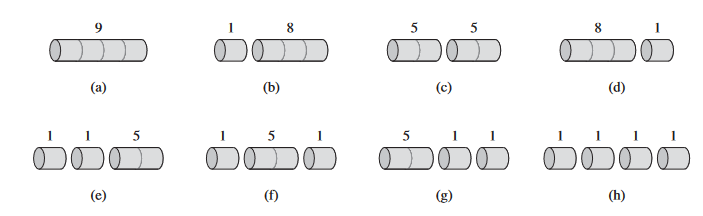

Aquí tenemos las formas para cortar una varilla de largo cuatro, arriba de cada pedazo está el valor por el que se va a vender, analizando esto, podemos ver que el corte que dará el mayor beneficio, es el que parte la vara por la mitad, que, en total, se vendería por 10.

# 2. RodCutting

## 2.1. Código Recursivo

In [ ]:
import random
# CutRod recursivo
def corteVarillaRecursivo(n, precios, cortes = 0, recursiones = 0, verbose = False):
    if verbose == True: print("\n N =",n)
    if n <= 1: return precios[n], cortes, recursiones
    valor = precios[n]
    if verbose == True: print("Valor varilla completa =", valor)
    precioMayor = 0
    nuevosCortes = 0
    for i in range(1, n):
        if verbose == True: print("Calculando derecha")
        recursiones+=1
        precioDer, cortesDer, recursiones = corteVarillaRecursivo((n-i), precios, cortes, recursiones, verbose)
        if verbose == True: print("PrecioDer", precioDer)

        if verbose == True: print("Comparando PrecioMayor anterior con nueva suma\n", precioMayor, precioDer + precios[i])

        if (precios[i]+precioDer) > precioMayor:
            if verbose == True: print("Nuevo precio es mayor")
            precioMayor = precios[i] + precioDer
            nuevosCortes = cortesDer + 1
        if verbose == True: print("precioMayor", precioMayor)
    
    if verbose == True: print("Retornando Valor o PrecioMayor\n",valor, precioMayor)
    if precioMayor > valor:
        if verbose == True: print("precioMayor es Mayor")
        return precioMayor, cortes+nuevosCortes, recursiones

    return valor, cortes, recursiones

In [ ]:
recursiones = 0
cortes = 0
precios = [0,1,5,8,9]
n = 4
valor = 0

valor,cortes,recursiones = corteVarillaRecursivo(n,precios,cortes,recursiones,False)
print("El mejor valor: ", valor)
print("Cantidad de cortes: ", cortes)
print("Cantidad de recursiones: ", recursiones)

El mejor valor:  10
Cantidad de cortes:  1
Cantidad de recursiones:  7


### 2.1.1 Descripción del algoritmo
El algoritmo **Corte de Varilla (recursivo)** recibe como entrada un entero $n$ que representa el largo de la varilla y un arreglo de precios $P$, donde $P[i]$ con $i \in R$ es el precio de una varilla de largo $i$, luego:

1. Verifica si el largo de la varilla es igual o menor a $1$, si es así retorna el precio $P[n]$.

2. De lo contrario comienza a probar cortando la varilla en todas las posibles convinaciones, empezando en 1 corte y realizando hasta $n-1$ cortes y llamandose recursivamente para cada corte.

3. En cada combinación y corte se evalúa el Valor Total que costaría la varilla de venderse en ese estado, y el Valor Total máximo es devuelto en cada caso.

4. Finalmente se retorna el Valor Total máximo y el número de cortes que se deben realizar para obtenerlo.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

## 2.2. Código Dinámico

In [ ]:
# CutRod dinámico
def corteVarillaDinamico(n, precios, cortes = 0, verbose = False):
    arregloValores = [0 for x in range(n+1)]
    arregloCortes = [0 for x in range(n+1)]

    if verbose == True: print("arregloValores =", arregloValores)

    if verbose == True: print("\nEntrando primer for")
    for i in range(1, n+1):
        if verbose == True: print("\ni =", i)
        valorMaximo = 0
        cortes = 0

        if verbose == True: print("\nEntrando segundo for")
        for j in range(1, i+1):
            if verbose == True: print("\nj =", j)
            if verbose == True: print("Valor Máximo Actual =", valorMaximo)
            if verbose == True: print("Precios[j] =", precios[j])
            if verbose == True: print("arregloValores[i",i,"- j",j,"] =", arregloValores[i-j])
            if verbose == True: print(precios[j],"+", arregloValores[i-j],"=", precios[j] + arregloValores[i-j])
            if (precios[j] + arregloValores[i-j]) > valorMaximo:
                if verbose == True: print("Valor máximo es menor")
                valorMaximo = (precios[j] + arregloValores[i-j])
            if verbose == True: print("Nuevo Valor Máximo =", valorMaximo)

        arregloValores[i] = valorMaximo
        if verbose == True: print("Vm / p[i]")
        if verbose == True: print(valorMaximo, precios[i])
        if valorMaximo != precios[i]:
            if verbose == True: print("No se utiliza la varilla completa")
            arregloCortes[i] = (arregloCortes[i-1] + 1)
        if verbose == True: print("arregloValores actual =", arregloValores)
        if verbose == True: print("arregloCortes actual =", arregloCortes)
    return arregloValores[n], arregloCortes[n]

In [ ]:
valor = 0
cortes = 0
precios = [0,1,5,8,9]
n = 4

valor,cortes = corteVarillaDinamico(n,precios,cortes,False)
print("El mejor valor: ", valor)
print("Cantidad de cortes: ", cortes)

El mejor valor:  10
Cantidad de cortes:  1


### 2.2.1 Descripición del algoritmo dinámico
El algoritmo **Corte de Varilla (dinámico)** recibe como entrada un entero $n$ que representa el largo de la varilla y un arreglo de precios $P$, donde $P[i]$ con $i \in R$ es el precio de una varilla de largo $i$, luego:

1. Crea e inicializa un arreglo de largo $n$ inicializado en ceros en el que se almacenarán los valores ya obtenidos a lo largo del algoritmo.

2. Luego comienza un ciclo desde 1 hasta n (inclusivos) 

3. En cada combinación y corte se evalúa el Valor Total que costaría la varilla de venderse en ese estado, y el Valor Total máximo es devuelto en cada caso.

4. Finalmente se retorna el Valor Total máximo y el número de cortes que se deben realizar para obtenerlo.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

### 2.2.2 Ejemplo en palabras
Consideremos el ejemplo puesto al principio de este informe, con un arreglo de precios $P$ y un largo de varilla $n$:

$P = [0, 1, 5, 8, 9]$

$n = 4$

Primero verifica si el largo de la varilla es igual o menor a 1, en cuyo caso retornaría $P[n]$, sin embargo este no es el caso por lo cual continúa:

Crea un arreglo $ArregloValores$ de largo $n+1$, es decir 5, e inicializa el primer valor en $0$.

Luego entra en un ciclo donde una variable $i$ va desde $1$ hasta $n = 4$ (ambos inclusivos):

En la primera iteración del primer ciclo, $i = 1$, se inicializa una variable llamada $ValorMaximo$ en $0$.

Después se entra en un nuevo ciclo donde una variable $j$ va desde $1$ hasta $i$ (ambos inclusivos):

En la primera iteración del segundo ciclo se obtiene la suma entre $P[j] = P[1] = 1$ y $ArregloValores[i-j] = ArregloValores[1-1] = 0$, lo cual da $1$; como esto es mayor al valor actual de $ValorMaximo$ este pasa a ser el nuevo valor de $ValorMaximo$.

Se termina el ciclo y se asigna el valor actual de $ValorMaximo$ a $ArregloValores[i]$:

$ArregloValores = [0, 1, 0, 0, 0]$

Se entra en la segunda iteración del primer ciclo, donde $i = 2$:

$ValorMaximo$ vuelve a valer $0$ y se entra en el segundo ciclo:

$j = 1$, se obtiene la suma entre $P[j] = P[1] = 1$ y $ArregloValores[i-j] = ArregloValores[2-1] = 1$, lo cual da $2$; como esto es mayor al valor actual de $ValorMaximo$ este pasa a ser el nuevo valor de $ValorMaximo$.

Ahora $j = 2$, se obtiene la suma entre $P[j] = P[2] = 5$ y $ArregloValores[i-j] = ArregloValores[2-2] = 0$, lo cual da $5$; como esto es mayor al valor actual de $ValorMaximo$ este pasa a ser el nuevo valor de $ValorMaximo$.

Se termina el ciclo y se asigna el valor actual de $ValorMaximo$ a $ArregloValores[i]$:

$ArregloValores = [0, 1, 5, 0, 0]$

A partir de aquí se repite el mismo proceso para $i = 3$ e $i = 4$. Realizando esto nos deja lo siguiente:

$ArregloValores = [0, 1, 5, 8, 10]$

Ambos ciclos terminan por lo cual el programa retorna $ArregloValores[n] = 10$.



### 2.2.3. Ejecución paso a paso (verbose = True)

In [ ]:
# Ejemplo
precios = [0, 1, 5, 8, 9]
n = 4
print("Entrada:")
print("n =", n)
print("Precios =", precios)
print("")
valor, cortes = corteVarillaDinamico(n, precios, 0, True)
print("\nSalida:")
print("Valor máximo",valor)
print("Cortes: ",cortes)

Entrada:
n = 4
Precios = [0, 1, 5, 8, 9]

arregloValores = [0, 0, 0, 0, 0]

Entrando primer for

i = 1

Entrando segundo for

j = 1
Valor Máximo Actual = 0
Precios[j] = 1
arregloValores[i 1 - j 1 ] = 0
1 + 0 = 1
Valor máximo es menor
Nuevo Valor Máximo = 1
Vm / p[i]
1 1
arregloValores actual = [0, 1, 0, 0, 0]
arregloCortes actual = [0, 0, 0, 0, 0]

i = 2

Entrando segundo for

j = 1
Valor Máximo Actual = 0
Precios[j] = 1
arregloValores[i 2 - j 1 ] = 1
1 + 1 = 2
Valor máximo es menor
Nuevo Valor Máximo = 2

j = 2
Valor Máximo Actual = 2
Precios[j] = 5
arregloValores[i 2 - j 2 ] = 0
5 + 0 = 5
Valor máximo es menor
Nuevo Valor Máximo = 5
Vm / p[i]
5 5
arregloValores actual = [0, 1, 5, 0, 0]
arregloCortes actual = [0, 0, 0, 0, 0]

i = 3

Entrando segundo for

j = 1
Valor Máximo Actual = 0
Precios[j] = 1
arregloValores[i 3 - j 1 ] = 5
1 + 5 = 6
Valor máximo es menor
Nuevo Valor Máximo = 6

j = 2
Valor Máximo Actual = 6
Precios[j] = 5
arregloValores[i 3 - j 2 ] = 1
5 + 1 = 6
Nuevo Valor Máxi

# 3. Propiedades del Algoritmo

## 3.1. Correctitud

El algoritmo CortarVarilla devuelve el valor máximo que se puede obtener cortando la varilla de largo $n$ y vendiendo las partes.

## 3.1.1 Prueba del Teorema por medio de Inducción

La hipótesis $T(n)$ se basa en que CortarVarilla retorna un elemento que es mayor o igual a cualquier otra combinación de cortes para el largo $n$.

Caso base $n = 1$: Si $T(1)$ la función CortarVarilla retorna el valor de una varilla de largo $1$ ya que esta no puede ser cortada más.

Hipotesis Inductiva: Para una varilla de largo $i$ y un arreglo $ArregloValores$ de largo $i+1$, el arreglo $ArregloValores[0..i-1]$ tiene los resultados de la mejor combinación de cortes para una varilla de largo $[0..i-1]$. 

Luego $CortarVarilla$ comparará los mejores resultados anteriores con el valor de venderse completa y almacenará el valor mayor en $ArregloValores[i]$.

Finalmente el elemento $ArregloValores[i]$ tendrá el resultado de la mejor combinación posible para un largo de varilla $i$, por lo tanto la función CortarVarilla es correcta.

## 3.2. Tiempo de Ejecución

El tiempo de ejecución, en todos los casos, es: $O(n^2)$

### Usando la fórmula de recurrencia
La fórmula de recurrencia T(n) del algoritmo se obtiene analizando sus partes.

Para el caso base $n \leq 1$ el algoritmo solo pregunta si el largo de la varilla es menor o igual a $1$ y luego retorna los valores sin realizar ninguna recursión, por esto se obtiene que $T(n)=O(1)$ si $n \leq 1$.

Para el resto de casos se tiene:

- Un ciclo for que va desde $1$ hasta $n$, por ello tiene un tiempo de ejecución de $O(n)$.

- Otro ciclo for que va desde $1$ hasta $i$, donde $i$ es la variable del ciclo anterior.

Juntando ambas partes se tiene que

$T(n) = \sum\limits{j=1}^{n} j$

$\sum\limits{j=1}^{n} j = \frac{n(n+1)}{2}$

Eliminando las constantes se tiene que:

$T(n) = n^2$

##3.3. Complejidad espacial
El algoritmo crea un arreglo de largo $n+1$ que almacena los resultados de los cálculos para cada largo de varilla, por ello la complejidad espacial del algoritmo es de $O(n)$. 

# 4. Experimentos

## 4.1. Cambios en implementación dinámica y recursiva cuando crece el tamaño del problema

### 4.1.1. Tiempo de ejecución experimental

El siguiente gráfico muestra una comparación entre el comportamiento del tiempo de ejecución del algoritmo **CortarVarilla** en su forma *recursiva* y *dinámica* en relación al tamaño de varilla, esto utilizando varillas de largo $n \in [2,20]$ y un arreglo de precios $[3, 5, 8, 11, 12, 15, 16, 17, 18, 20, 21, 26, 28, 40, 41, 43, 45, 47, 49, 50]$.

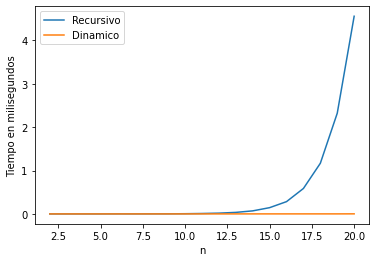

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

preciosExp = [0, 3, 5, 8, 11, 12, 15, 16, 17, 18, 20, 21, 26, 28, 40, 41, 43, 45, 47, 49, 50]

x=[];
yR=[];
yD=[];

for n in range(2,21):
  x.append(n)
  t = repeat(setup="from __main__ import corteVarillaRecursivo", stmt=f"corteVarillaRecursivo({n}, {preciosExp})", repeat=1, number=10)
  yR.append(t)
  t = repeat(setup="from __main__ import corteVarillaDinamico", stmt=f"corteVarillaDinamico({n}, {preciosExp})", repeat=1, number=10)
  yD.append(t)


plt.plot(x,yR)
plt.plot(x,yD)
plt.legend(["Recursivo", "Dinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que la implementación dinámica del algoritmo **CortarVarilla** es mucho más rápida en comparacion a la implementación recursiva

Cabe notar que a diferencia de experimentos anteriores con otros algoritmos, aquí no existen los puntos altos en la gráfica o "ruido" que es causado normalmente debido al comportamiento impredecible de los procesadores, esto es posiblemente por lo corto que es el problema y el rango en el que se encuentra $n$, muy probablemente para rangos de $n$ mayores se empiezen a ver esos eventos.

## 4.2 Cantidad de problemas resueltos por el dinámico y el recursivo
El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **Select** (implementación propia) y **Randomized Select**.

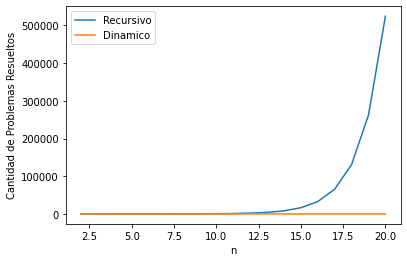

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

# CutRod recursivo ContadorProblemas SoloLadoDerecho
def corteVarillaRecursivoContProb(n, precios, contProb = 1):
    precioMayor = 0
    for i in range(1, n):
        contProb+=1
        precioDer, contProb = corteVarillaRecursivoContProb((n-i), precios, contProb)
        precioMayor = max(precioMayor, precios[i]+precioDer)
    if precioMayor > precios[n]:
        return precioMayor, contProb
    return precios[n], contProb
# CutRod recursivo ContProblemas Ambos Lados
def corteVarillaRecursivoContProbAmbosLados(n, precios, contProb = 1):
    precioMayor = 0
    for i in range(1, n):
        contProb+=1
        precioIzq, contProb = corteVarillaRecursivoContProbAmbosLados(i, precios, contProb)
        precioDer, contProb = corteVarillaRecursivoContProbAmbosLados((n-i), precios, contProb)
        precioMayor = max(precioMayor, precioIzq + precioDer)
    if precioMayor > precios[n]:
        return precioMayor, contProb
    return precios[n], contProb
# CutRod dinámico ContadorProblemas
def corteVarillaDinamicoContProb(n, precios):
    arregloValores = [0 for x in range(n+1)]
    contProb = 0
    for i in range(1, n+1):
        contProb+=1
        valorMaximo = 0
        for j in range(1, i+1):
            valorMaximo = max(valorMaximo, (precios[j] + arregloValores[i-j]))
        arregloValores[i] = valorMaximo
    return arregloValores[n], contProb+1
# Fin código

preciosExp = [0, 3, 5, 8, 11, 12, 15, 16, 17, 18, 20, 21, 26, 28, 40, 41, 43, 45, 47, 49, 50]

x=[];
yR=[];
yD=[];

for n in range(2,21):
  x.append(n)

  m, contR = corteVarillaRecursivoContProb(n, preciosExp)
  yR.append(contR)
  m, contD = corteVarillaDinamicoContProb(n, preciosExp)
  yD.append(contD)

plt.plot(x,yR)
plt.plot(x,yD)
plt.legend(["Recursivo", "Dinamico"])

plt.xlabel('n')
plt.ylabel('Cantidad de Problemas Resueltos')
plt.show()

### Analisis del gráfico

En el gráfico se aprecia que la implementación recursiva resuelve muchísimos más casos que la implementación dinámica, y si juntamos esto con el experimento del tiempo de ejecución podemos concluir que la versión dinámica es mucho mejor en comparación a la versión recursiva gracias a su menor tiempo de ejecución.